In [1]:
# packages

import pandas as pd
import numpy as np

# Transform messy data

In [2]:
cr = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_5/data/Index__Violent__Property__and_Firearm_Rates_By_County__Beginning_1990.csv")

ue = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_5/data/unemployment data_BLS beta labs.csv")

In [3]:
cr.head(10)

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,1990,292594.0,14418,4927.6,1524,520.9,12894,4406.8,122.0,41.7
1,Albany,1991,294030.0,15464,5259.3,1674,569.3,13790,4690.0,120.0,40.8
2,Albany,1992,295018.0,16249,5507.8,1588,538.3,14661,4969.5,116.0,39.3
3,Albany,1993,294302.0,15139,5144.0,1669,567.1,13470,4576.9,104.0,35.3
4,Albany,1994,293843.0,16724,5691.5,1771,602.7,14953,5088.8,162.0,55.1
5,Albany,1995,290756.0,16699,5743.3,1606,552.4,15093,5191.0,157.0,54.0
6,Albany,1996,291536.0,13676,4691.0,1408,483.0,12268,4208.1,117.0,40.1
7,Albany,1997,290760.0,14542,5001.4,1450,498.7,13092,4502.7,149.0,51.2
8,Albany,1998,294930.0,13733,4656.4,1310,444.2,12423,4212.2,108.0,36.6
9,Albany,1999,292929.0,14145,4828.8,1133,386.8,13012,4442.0,113.0,38.6


In [4]:
cr.isna().sum()

County             0
Year               0
Population         0
Index Count        0
Index Rate         0
Violent Count      0
Violent Rate       0
Property Count     0
Property Rate      0
Firearm Count     65
Firearm Rate      65
dtype: int64

In [5]:
ue.head()

,Series ID,Year,Period,Label,Value
0,LAUCN360010000000003,2021,M01,2021 Jan,5.8
1,LAUCN360010000000003,2021,M02,2021 Feb,6.0
2,LAUCN360010000000003,2021,M03,2021 Mar,5.5
3,LAUCN360010000000003,2021,M04,2021 Apr,4.8
4,LAUCN360010000000003,2021,M05,2021 May,4.4


In [6]:
# not enough data it seems like, only 2021-2023?????

## Inpatient use

In [7]:
IP = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/Inpatient_2015-2020.csv", encoding="utf-16", sep = '\t')

In [8]:
IP = IP[IP.County != '-All-']
IP = IP.drop(columns = ['Regn Typ', 'Level Agg'])

IP = IP.rename(columns ={'Year (copy)': 'ip_Year'})
IP = IP.drop(columns = ['Region'])

### IP cleaning

In [9]:
IP.head()

,ip_Year,County,Age Group,Inpatient Type,Average Daily Census
18,2015,Allegany,Adult,General Hospital*,1.5
19,2015,Allegany,Adult,Private Hospital,0
20,2015,Allegany,Adult,State Psychiatric Center,2.4
21,2015,Allegany,Adult,Total Inpatient,3.9
22,2015,Allegany,Child,General Hospital*,0.8


In [10]:
IP.columns

Index(['ip_Year', 'County', 'Age Group', 'Inpatient Type',
       'Average Daily Census'],
      dtype='object')

In [11]:
IP['Average Daily Census'] =pd.to_numeric(IP['Average Daily Census'])

### transforming

In [12]:
_remap = {'General Hospital*':'Gen_H', 'State Psychiatric Center':'Sta_P', 'Private Hospital':'Pri_H', 'Residential Treatment Facility':'Resi_F','Total Inpatient':'Total'}

IP['Inpatient Type'] = IP['Inpatient Type'].map(_remap)

In [13]:
# aggregate values base on 'ra_Year','County', 'Inpatient Type'
IP = IP.groupby(['ip_Year','County', 'Inpatient Type']).agg({'Average Daily Census':'sum'})
IP = IP.reset_index()

In [14]:
for cat, group in IP.groupby('Inpatient Type'):
    # rename columns based on inpatient type
    group = group.rename(columns={'Average Daily Census': '{0}_AveDaily'.format(cat)}) 
    group = group.drop(columns = ['Inpatient Type'])
    globals()[f'{cat}'] = group

In [15]:
IP_result = pd.merge(Gen_H,Sta_P, how="outer", on=["ip_Year", "County"])
IP_result = pd.merge(IP_result,Pri_H, how="outer", on=["ip_Year", "County"])
IP_result = pd.merge(IP_result,Resi_F, how="outer", on=["ip_Year", "County"])
IP_result = pd.merge(IP_result,Total, how="outer", on=["ip_Year", "County"])

*yay*

In [16]:
IP_result.head()

,ip_Year,County,Gen_H_AveDaily,Sta_P_AveDaily,Pri_H_AveDaily,Resi_F_AveDaily,Total_AveDaily
0,2015,Albany,41.9,88.2,25.4,3.5,159.1
1,2015,Allegany,2.3,3.5,2.2,0.9,8.9
2,2015,Bronx,512.0,222.5,43.9,65.4,843.8
3,2015,Broome,41.2,70.8,2.1,11.6,125.6
4,2015,Cattaraugus,15.4,5.1,0.1,1.1,21.7


In [17]:
IP_result.isna().sum()
# no missing values

ip_Year            0
County             0
Gen_H_AveDaily     0
Sta_P_AveDaily     0
Pri_H_AveDaily     0
Resi_F_AveDaily    0
Total_AveDaily     0
dtype: int64

## Readmission

In [18]:
ra_13 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2013.csv", encoding="utf-16", sep = '\t')
ra_14 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2014.csv", encoding="utf-16", sep = '\t')
ra_15 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2015.csv", encoding="utf-16", sep = '\t')
ra_16 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2016.csv", encoding="utf-16", sep = '\t')
ra_17 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2017.csv", encoding="utf-16", sep = '\t')
ra_18 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2018.csv", encoding="utf-16", sep = '\t')
ra_19 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2019.csv", encoding="utf-16", sep = '\t')
ra_20 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2020.csv", encoding="utf-16", sep = '\t')
ra_21 = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/RA_2021.csv", encoding="utf-16", sep = '\t')

In [19]:
# merge readmission dataset

ra_merged = pd.concat([ra_13, ra_14, ra_15, ra_16, ra_17, ra_18, ra_19, ra_20, ra_21], ignore_index=True)

In [20]:
ra_merged['Year '] = ra_merged['Year '].fillna(2013)

ra_merged = ra_merged.drop(columns = ['Year'])
ra_merged = ra_merged.drop(columns = ['Region'])

ra_merged = ra_merged.rename(columns ={'Year ': 'ra_Year'})
ra_merged['ra_Year'] = ra_merged['ra_Year'].astype(int)

In [21]:
ra_merged = ra_merged.rename(columns ={' County': 'County'})

In [22]:
ra_merged['County'] = ra_merged['County'].apply(lambda x: x.replace('St. Lawrence','St Lawrence'))

### RA cleaning

In [23]:
ra_merged.head(20)
# IP 30-days: 30-days readmission rate of inpatient setting
# IP 90-days: 90-days readmission rate of inpatient setting
# ER 30-days: 30-days revisit of emergencey room rate
# ER 90-days: 90-days revisit of emergencey room rate

,County,Age Group,Inpatient Type,Hospital,Number of Psychiatric Discharges,IP - 30 Days,IP - 90 Days,ER - 30 Days,ER - 90 Days,ra_Year
0,Cattaraugus,Adult,General Hospital,Olean General Hospital,0-500,13%,23%,14%,25%,2013
1,Chautauqua,Adult,General Hospital,"Brooks - TLC Hospital System, Inc.",0-500,14%,25%,23%,35%,2013
2,Chautauqua,Adult,General Hospital,"Woman's Christian Assoc. of Jamestown, NY",0-500,17%,30%,20%,35%,2013
3,Chautauqua,Children,General Hospital,"Woman's Christian Assoc. of Jamestown, NY",0-500,9%,17%,16%,29%,2013
4,Chemung,Adult,General Hospital,St. Joseph's Hospital,0-500,14%,21%,15%,24%,2013
5,Chemung,Adult,State Psychiatric,Elmira Psychiatric Center,0-500,9%,25%,7%,21%,2013
6,Chemung,Children,State Psychiatric,Elmira Psychiatric Center,0-500,1%,10%,8%,23%,2013
7,Erie,Adult,General Hospital,Buffalo General Hospital - Kaleida Health,0-500,10%,23%,19%,35%,2013
8,Erie,Adult,General Hospital,Erie County Medical Center,1001-1500,10%,19%,16%,28%,2013
9,Erie,Adult,Private Hospital,"Brylin Hospitals, Inc.",0-500,9%,25%,10%,18%,2013


In [24]:
ra_merged.columns

Index(['County', 'Age Group', 'Inpatient Type', 'Hospital',
       'Number of Psychiatric Discharges', 'IP - 30 Days', 'IP - 90 Days',
       'ER - 30 Days', 'ER - 90 Days', 'ra_Year'],
      dtype='object')

In [25]:
ra_imp = ra_merged['Inpatient Type'].unique().tolist()
ra_imp

['General Hospital', 'State Psychiatric', 'Private Hospital']

In [26]:
ra_merged.isna().sum()
# no missing values

County                              0
Age Group                           0
Inpatient Type                      0
Hospital                            0
Number of Psychiatric Discharges    0
IP - 30 Days                        0
IP - 90 Days                        0
ER - 30 Days                        0
ER - 90 Days                        0
ra_Year                             0
dtype: int64

In [27]:
# drop hostpital location
ra_merged = ra_merged.drop(columns = ['Hospital'])

In [28]:
ra_merged['Number of Psychiatric Discharges'].unique()

array(['0-500', '1001-1500', '501-1000', '1501-2000', '2001-2500', '2500'],
      dtype=object)

In [29]:
# the Number of Psychiatric Discharges is actually categorical

# in order to aggreage the data we need to calculate the frequencies based on this number
# make an assumption: choose the middle point of the range to calculate the frequencies
ra_merged['Number of Psychiatric Discharges'] = ra_merged['Number of Psychiatric Discharges'].map({'0-500': '250', '1001-1500': '1250', '501-1000':'750', '1501-2000':'1750', '2001-2500':'2250','2500':'2500'})

ra_merged['Number of Psychiatric Discharges'] = pd.to_numeric(ra_merged['Number of Psychiatric Discharges'])

In [30]:
# convert percentage values to numbers
# numm = ['IP - 30 Days', 'IP - 90 Days','ER - 30 Days', 'ER - 90 Days']

for col in ra_merged.columns[4:8]:
    ra_merged[col] = ra_merged[col].apply(lambda x: int(x.replace('%', '')))
    ra_merged[col] = ra_merged[col].apply(lambda x: x*0.01)

In [31]:
# calculate absolute frequencies estimation (still floats!!!!!)
ra_merged['IP30'] = (ra_merged['IP - 30 Days'] * ra_merged['Number of Psychiatric Discharges'])
ra_merged['IP90'] = (ra_merged['IP - 90 Days'] * ra_merged['Number of Psychiatric Discharges'])
ra_merged['ER30'] = (ra_merged['ER - 30 Days'] * ra_merged['Number of Psychiatric Discharges'])
ra_merged['ER90'] = (ra_merged['ER - 90 Days'] * ra_merged['Number of Psychiatric Discharges'])

In [32]:
ra_merged = ra_merged.drop(columns = ['IP - 30 Days', 'IP - 90 Days','ER - 30 Days', 'ER - 90 Days'])

In [33]:
ra_merged = ra_merged.drop(columns = ['Number of Psychiatric Discharges'])

### transforming data

In [34]:
# aggregate values base on 'ra_Year','County', 'Inpatient Type'
ra_merged = ra_merged.groupby(['ra_Year','County', 'Inpatient Type']).agg({'IP30':'sum', 'IP90':'sum', 'ER30':'sum', 'ER90':'sum'})
ra_merged = ra_merged.reset_index()

In [35]:
ip_remap = {'General Hospital':'Gen_H', 'State Psychiatric':'Sta_P', 'Private Hospital':'Pri_H'}

ra_merged['Inpatient Type'] = ra_merged['Inpatient Type'].map(ip_remap)

In [36]:
for cat, group in ra_merged.groupby('Inpatient Type'):
    # rename columns based on inpatient type
    group = group.rename(columns={'IP30': '{0}_IP30'.format(cat), 'IP90': '{0}_IP90'.format(cat), 'ER30': '{0}_ER30'.format(cat), 'ER90': '{0}_ER90'.format(cat)}) 
    group = group.drop(columns = ['Inpatient Type'])
    globals()[f'{cat}'] = group

In [37]:
RA_result = pd.merge(Gen_H,Sta_P, how="outer", on=["ra_Year", "County"])
RA_result = pd.merge(RA_result,Pri_H, how="outer", on=["ra_Year", "County"])

*yay*

In [38]:
RA_result

,ra_Year,County,Gen_H_IP30,Gen_H_IP90,Gen_H_ER30,Gen_H_ER90,Sta_P_IP30,Sta_P_IP90,Sta_P_ER30,Sta_P_ER90,Pri_H_IP30,Pri_H_IP90,Pri_H_ER30,Pri_H_ER90
0,2013,Albany,85.0,117.5,32.5,57.5,50.0,72.5,32.5,50.0,NaN,NaN,NaN,NaN
1,2013,Bronx,1292.5,2080.0,1355.0,2170.0,70.0,145.0,57.5,110.0,NaN,NaN,NaN,NaN
2,2013,Broome,35.0,65.0,45.0,80.0,30.0,67.5,57.5,115.0,NaN,NaN,NaN,NaN
3,2013,Cattaraugus,32.5,57.5,35.0,62.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Cayuga,52.5,100.0,72.5,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2021,Sullivan,37.5,67.5,65.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,2021,Tompkins,25.0,67.5,45.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,2021,Warren,120.0,225.0,157.5,255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,2021,Westchester,765.0,1332.5,987.5,1660.0,NaN,NaN,NaN,NaN,135.0,342.5,217.5,452.5


In [39]:
dfff = dict(RA_result.isna().sum())
dfff

{'ra_Year': 0,
 'County': 0,
 'Gen_H_IP30': 0,
 'Gen_H_IP90': 0,
 'Gen_H_ER30': 0,
 'Gen_H_ER90': 0,
 'Sta_P_IP30': 250,
 'Sta_P_IP90': 250,
 'Sta_P_ER30': 250,
 'Sta_P_ER90': 250,
 'Pri_H_IP30': 340,
 'Pri_H_IP90': 340,
 'Pri_H_ER30': 340,
 'Pri_H_ER90': 340}

## Medicaid Utilizaton

In [40]:
MA = pd.read_csv("C:/Users/栗寻/Desktop/RPI/6600 Data Analytics/assignments/assignment_6_dec8/Medicaid Utilization.csv", encoding="utf-16", sep = '\t')

In [41]:
# drop useless column: Geoperspective - Recipient
# This value originated from the OMH NY website. When downloading this data, there are two perspectives: recipient and provider. 
# Since recipient pov is more relevent to the goal of this analysis, which is to gain some insights on the mental health service needs, I chose this one.

MA = MA.drop(columns = ['Geo Perspective'])

In [42]:
# rename columns for convenience
MA = MA.rename(columns ={'Year': 'ma_Year', 'County  ': 'County'})

In [43]:
MA = MA.rename(columns ={'Age Group  ': 'Age Group', 'Program Type  ': 'Program Type', 'Service Units ': 'Service Units'})

**The dictionary is extremely unclear and vague, hence lots of exploration and cleaning:**

In [44]:
# somehow there are missing values in the County feature and there are all from year 2019 and 2020, year 2021 has them as well but they were labeled '--N/A'
# separate nan values as one dataframe

# find the reason of missing values in County variable later
missingc = MA.loc[(MA['County'].isna())]  # 330 lines of data
missingc['ma_Year'].unique() 

array([2019, 2020], dtype=int64)

In [45]:
# drop nan
MA = MA.loc[(~MA['County'].isna())]

*clean up county variable*

In [46]:
# the value of the country variable is really messy so clean it up a bit
# all values from yr14-20 are of the same format so start by cleaning them up

MA['County'] = MA['County'].apply(lambda x: str(x[2:]))

# then drop N/a value in yr 2021
missing = MA.loc[MA['County'] == 'N/A']
MA = MA.loc[MA['County'] != 'N/A']

# then clean up 2021 county values
MA.loc[MA['ma_Year'] == 2021, 'County'] = MA.loc[MA['ma_Year'] == 2021, 'County'].apply(lambda x: str(x[2:]))

In [47]:
# view the result
ma_c = MA['County'].unique().tolist()
len(ma_c)
# should be 62 but is 63

ma_c
# 'Saint Lawrence' and 'St Lawrence' are the same one, unify the name
MA.loc[MA['County'] == 'Saint Lawrence', 'County'] = MA.loc[MA['County'] == 'Saint Lawrence', 'County'].apply(lambda x: 'St Lawrence')

In [48]:
# confirm
ma_c = MA['County'].unique().tolist()
len(ma_c)

62

*a bit clueless about the reason of the missing values but combine them together*

In [49]:
# combine missing value dfs
missingc = pd.concat([missingc, missing], ignore_index=False)

*oh well more cleaning up: Age Group*

In [50]:
# drop everything other than -All-
MA = MA.loc[MA['Age Group'] == '-All-']

# MA['Age Group'] = MA['Age Group'].apply(lambda x: str(x[2:]))

*more: Program System, Category, Type*

In [51]:
# MA['Program System'].unique()

In [52]:
# ma_gby = MA.groupby(['Program System'])
# for sys, group in ma_gby:
#     print(sys + ':' + '\n')
#     print(group['Program Category'].unique().tolist())
# #     print(group['Program Type'].unique().tolist())
#     print('---')

In [53]:
# ma_gby = MA.groupby(['Program System'])

# l1 = set()
# l2 = set()
# l3 = set()

# for sys, group in ma_gby:
#     print('\n')
#     print('\n')
#     print('SYSTEM NAME:')
#     print(sys + ':' + '\n')
#     cate_gby = group.groupby(['Program Category'])
#     unq = set()
#     for cat, sub in cate_gby:
#         print(cat + ' of ' + sys)
#         l = []
#         s = []
#         l.append(cat)
#         s = sub['Program Type'].unique().tolist()
#         print('type in the cat: ')
#         print(s)
#         print('--')
#         unq.update(s)
#     print('here is the set: ')
#     print(unq)

In [54]:
# drop type: is difficult to interpret and could potentially cause overfitting
MA = MA.drop(columns = ['Program Type'])

*Some problems from examining the mess:*

1. BH category has repeated type that appear in MH and SUD -> drop 'Psych Inpatient', 'SUD Inpatient' categories from BH
2. They misspelled opioid in SUD -> unify it
3. SUD: 'OASAS Outpatient ' and 'OASAS Outpatient' are the same thing -> fix it
4. what is MH residential in MH
----
1. MH: Mental Health
2. BH: Behavioral Health
3. SUD: Substance Use Disorder
4. OASAS: office of addiction services and supports

In [55]:
# fix (1)
MA = MA.drop(MA[(MA['Program System'] == 'BH (Behavioral Health)') & (MA['Program Category'] == 'SUD Inpatient')].index)
MA = MA.drop(MA[(MA['Program System'] == 'BH (Behavioral Health)') & (MA['Program Category'] == 'Psych Inpatient')].index)

In [56]:
# fix (2)

# first question: are they the same or not
op1 = MA.loc[(MA['Program System'] == 'SUD (Substance Use Disorder)') & (MA['Program Category'] == 'OASAS Opiod')]
print(op1['ma_Year'].unique())

op2 = MA.loc[(MA['Program System'] == 'SUD (Substance Use Disorder)') & (MA['Program Category'] == 'OASAS Opioid')]
print(op2['ma_Year'].unique())
# no. op1 contains from 14 to 18, op2 contains from 19 to 21

# fix the typo
MA['Program Category'] = MA['Program Category'].apply(lambda x: x.replace('OASAS Opiod', 'OASAS Opioid'))

[2014 2015 2016 2017 2018]
[2019 2020 2021]


In [57]:
# fix (3)

# first question: are they the same or not
otp1 = MA.loc[(MA['Program System'] == 'SUD (Substance Use Disorder)') & (MA['Program Category'] == 'OASAS Outpatient ')]
print(otp1['ma_Year'].unique())

otp2 = MA.loc[(MA['Program System'] == 'SUD (Substance Use Disorder)') & (MA['Program Category'] == 'OASAS Outpatient')]
print(otp2['ma_Year'].unique())
# no. otp1 contains from 14 to 18, otp2 contains from 19 to 21

# fix the typo
MA['Program Category'] = MA['Program Category'].apply(lambda x: x.replace('OASAS Outpatient ', 'OASAS Outpatient'))

[2014 2015 2016 2017 2018]
[2019 2020 2021]


In [58]:
# (4)

# wHaT iS tHiS
mhr = MA.loc[(MA['Program System'] == 'MH (Mental Health)') & (MA['Program Category'] == 'MH Residential')]
print(mhr['ma_Year'].unique())
# i am almost certain it is OMH residential miss-labeled
omhr = MA.loc[(MA['Program System'] == 'MH (Mental Health)') & (MA['Program Category'] == 'OMH Residential')]
print(omhr['ma_Year'].unique())
# so predictable ugh

# fix it
MA['Program Category'] = MA['Program Category'].apply(lambda x: x.replace('MH Residential', 'OMH Residential'))
MA['Program Category'] = MA['Program Category'].apply(lambda x: x.replace('OOMH Residential', 'OMH Residential'))

[2014 2015 2016 2017 2018]
[2019 2020 2021]


*numbers are not of the type integer*  WHAT IS THIS DATA ( '_'

In [59]:
# MA['Individuals Served'].unique()
# MA['Service Units'].unique()

*suprise more missing values*

In [60]:
# remove missing values again, these rows are for certain useless but catch them with a variable anyways

missing_more = MA.loc[MA['Individuals Served'] == '--']
MA = MA.loc[MA['Individuals Served'] != '--']

In [61]:
# get rid of all the commas and dollar signs

MA['Individuals Served'] = MA['Individuals Served'].apply(lambda x: x.replace(',', ''))
MA['Service Units'] = MA['Service Units'].apply(lambda x: x.replace(',', ''))
MA['Medicaid Paid ($)'] = MA['Medicaid Paid ($)'].apply(lambda x: x.replace(',', ''))
MA['Medicaid Paid ($)'] = MA['Medicaid Paid ($)'].apply(lambda x: x.replace('$', ''))

In [62]:
# convert to integer

MA['Individuals Served'] = MA['Individuals Served'].apply(lambda x: int(x))
MA['Service Units'] = MA['Service Units'].apply(lambda x: int(x))
MA['Medicaid Paid ($)'] = MA['Medicaid Paid ($)'].apply(lambda x: int(x))

In [63]:
MA.dtypes

# yay

ma_Year                int64
County                object
Age Group             object
Program System        object
Program Category      object
Individuals Served     int64
Service Units          int64
Medicaid Paid ($)      int64
dtype: object

### Transforming

**modify the dataframe and form a new one in terms of year and county**

In [64]:
MA[MA == '--'].sum()
# no more weird missing value values in dataframe thank the universe

ma_Year               0.0
County                  0
Age Group               0
Program System          0
Program Category        0
Individuals Served    0.0
Service Units         0.0
Medicaid Paid ($)     0.0
dtype: object

In [65]:
# remap the values because they are too dang long
cat_remap = {'OMH Residential':'OHM_R', 'OMH Licensed Clinic':'OMH_LC',  'OMH Specialty':'OMH_S', 'Psych ER':'Psy_ER', 'Psych Inpatient':'Psy_IP', 'OASAS Opioid':'O_OP', 'OASAS Outpatient':'O_Otp', 'SUD ER':'SUC_ER', 'SUD Inpatient':'SUD_IP', 'BH Clinic':'BH_C', 'BH Outpatient Practitioner':'BH_OP', 'MH RX':'MH_RX', 'Psych Inpatient Physician':'Psy_IPP', 'SUD Inpatient Physician':'SUD_IPP', 'SUD RX':'SUD_RX', 'Integrated Clinic':'IN_C', 'SUD Residential':'SUD_R', 'OASAS Residential':'O_R', 'Crisis Intervention':'CRI_IN', 'CPEP':'CPEP', 'Crisis Residential':'CRI_R'}

MA['Program Category'] = MA['Program Category'].map(cat_remap)

In [66]:
MA = MA.drop(columns = ['Age Group'])

In [67]:
# aggregate values base on 'ma_Year','County', 'Program Category'
MA = MA.groupby(['ma_Year','County', 'Program Category']).agg({'Individuals Served':'sum', 'Service Units':'sum', 'Medicaid Paid ($)':'sum'})
MA = MA.reset_index()

In [68]:
# create one df for each program cats
for cat, group in MA.groupby('Program Category'):
    # rename columns based on services
    group = group.rename(columns={'Individuals Served': '{0}_Indiv_Ser'.format(cat), 'Service Units': '{0}_SU'.format(cat), 'Medicaid Paid ($)': '{0}_MP'.format(cat)}) 
    # drop services labels
    group = group.drop(columns = ['Program Category'])
    globals()[f'{cat}'] = group
#     to_b_dropped.append('{0}_Year'.format(cat))
#     to_b_dropped.append('{0}_County'.format(cat))

In [69]:
# final dataframe

# df_list = [MH_RX,OHM_R,OMH_LC,OMH_S,O_OP,Psy_ER,Psy_IP,Psy_IPP,SUC_ER,SUD_IP,SUD_IPP,SUD_RX,IN_C,SUD_R,O_R,CRI_IN,CPEP,CRI_R]

MA_result = pd.merge(BH_C,BH_OP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,MH_RX, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,OHM_R, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,OMH_LC, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,OMH_S, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,O_OP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,O_Otp, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,Psy_ER, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,Psy_IP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,Psy_IPP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,SUC_ER, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,SUD_IP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,SUD_IPP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,SUD_RX, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,IN_C, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,SUD_R, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,O_R, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,CRI_IN, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,CPEP, how="outer", on=["ma_Year", "County"])
MA_result = pd.merge(MA_result,CRI_R, how="outer", on=["ma_Year", "County"])

**yayy**

In [70]:
MA_result.head(20)

,ma_Year,County,BH_C_Indiv_Ser,BH_C_SU,BH_C_MP,BH_OP_Indiv_Ser,BH_OP_SU,BH_OP_MP,MH_RX_Indiv_Ser,MH_RX_SU,...,O_R_MP,CRI_IN_Indiv_Ser,CRI_IN_SU,CRI_IN_MP,CPEP_Indiv_Ser,CPEP_SU,CPEP_MP,CRI_R_Indiv_Ser,CRI_R_SU,CRI_R_MP
0,2014,Albany,987.0,3513.0,373266.0,1556.0,6769.0,405482.0,6352,50601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,Allegany,299.0,913.0,110828.0,443.0,1765.0,102730.0,1446,10720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,Bronx,19874.0,85158.0,10347292.0,18552.0,71673.0,4084219.0,85506,672950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,Broome,1613.0,5080.0,508435.0,1563.0,5748.0,366705.0,6919,52898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,Cattaraugus,394.0,786.0,128540.0,801.0,2379.0,148810.0,3433,27307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,Cayuga,436.0,850.0,121332.0,687.0,2481.0,177209.0,3413,24568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,Chautauqua,829.0,2561.0,188743.0,1843.0,5565.0,380212.0,7984,59432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,Chemung,456.0,838.0,55952.0,1260.0,3475.0,219041.0,4687,35881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014,Chenango,407.0,854.0,100503.0,489.0,1511.0,89858.0,1633,11833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,Clinton,460.0,1030.0,80888.0,906.0,4120.0,227317.0,3515,28171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
dff = dict(MA_result.isna().sum())

In [72]:
dff

{'ma_Year': 0,
 'County': 0,
 'BH_C_Indiv_Ser': 8,
 'BH_C_SU': 8,
 'BH_C_MP': 8,
 'BH_OP_Indiv_Ser': 3,
 'BH_OP_SU': 3,
 'BH_OP_MP': 3,
 'MH_RX_Indiv_Ser': 0,
 'MH_RX_SU': 0,
 'MH_RX_MP': 0,
 'OHM_R_Indiv_Ser': 65,
 'OHM_R_SU': 65,
 'OHM_R_MP': 65,
 'OMH_LC_Indiv_Ser': 0,
 'OMH_LC_SU': 0,
 'OMH_LC_MP': 0,
 'OMH_S_Indiv_Ser': 82,
 'OMH_S_SU': 82,
 'OMH_S_MP': 82,
 'O_OP_Indiv_Ser': 228,
 'O_OP_SU': 228,
 'O_OP_MP': 228,
 'O_Otp_Indiv_Ser': 9,
 'O_Otp_SU': 9,
 'O_Otp_MP': 9,
 'Psy_ER_Indiv_Ser': 7,
 'Psy_ER_SU': 7,
 'Psy_ER_MP': 7,
 'Psy_IP_Indiv_Ser': 8,
 'Psy_IP_SU': 8,
 'Psy_IP_MP': 8,
 'Psy_IPP_Indiv_Ser': 252,
 'Psy_IPP_SU': 252,
 'Psy_IPP_MP': 252,
 'SUC_ER_Indiv_Ser': 14,
 'SUC_ER_SU': 14,
 'SUC_ER_MP': 14,
 'SUD_IP_Indiv_Ser': 48,
 'SUD_IP_SU': 48,
 'SUD_IP_MP': 48,
 'SUD_IPP_Indiv_Ser': 275,
 'SUD_IPP_SU': 275,
 'SUD_IPP_MP': 275,
 'SUD_RX_Indiv_Ser': 8,
 'SUD_RX_SU': 8,
 'SUD_RX_MP': 8,
 'IN_C_Indiv_Ser': 400,
 'IN_C_SU': 400,
 'IN_C_MP': 400,
 'SUD_R_Indiv_Ser': 426,
 'SUD_R_S

In [73]:
dff.keys()

dict_keys(['ma_Year', 'County', 'BH_C_Indiv_Ser', 'BH_C_SU', 'BH_C_MP', 'BH_OP_Indiv_Ser', 'BH_OP_SU', 'BH_OP_MP', 'MH_RX_Indiv_Ser', 'MH_RX_SU', 'MH_RX_MP', 'OHM_R_Indiv_Ser', 'OHM_R_SU', 'OHM_R_MP', 'OMH_LC_Indiv_Ser', 'OMH_LC_SU', 'OMH_LC_MP', 'OMH_S_Indiv_Ser', 'OMH_S_SU', 'OMH_S_MP', 'O_OP_Indiv_Ser', 'O_OP_SU', 'O_OP_MP', 'O_Otp_Indiv_Ser', 'O_Otp_SU', 'O_Otp_MP', 'Psy_ER_Indiv_Ser', 'Psy_ER_SU', 'Psy_ER_MP', 'Psy_IP_Indiv_Ser', 'Psy_IP_SU', 'Psy_IP_MP', 'Psy_IPP_Indiv_Ser', 'Psy_IPP_SU', 'Psy_IPP_MP', 'SUC_ER_Indiv_Ser', 'SUC_ER_SU', 'SUC_ER_MP', 'SUD_IP_Indiv_Ser', 'SUD_IP_SU', 'SUD_IP_MP', 'SUD_IPP_Indiv_Ser', 'SUD_IPP_SU', 'SUD_IPP_MP', 'SUD_RX_Indiv_Ser', 'SUD_RX_SU', 'SUD_RX_MP', 'IN_C_Indiv_Ser', 'IN_C_SU', 'IN_C_MP', 'SUD_R_Indiv_Ser', 'SUD_R_SU', 'SUD_R_MP', 'O_R_Indiv_Ser', 'O_R_SU', 'O_R_MP', 'CRI_IN_Indiv_Ser', 'CRI_IN_SU', 'CRI_IN_MP', 'CPEP_Indiv_Ser', 'CPEP_SU', 'CPEP_MP', 'CRI_R_Indiv_Ser', 'CRI_R_SU', 'CRI_R_MP'])

In [74]:
# drop columns that has too many missing values
# very likely to be newly introduced programs
dropthese = ['IN_C_Indiv_Ser', 'IN_C_SU', 'IN_C_MP', 'SUD_R_Indiv_Ser', 'SUD_R_SU', 'SUD_R_MP', 'O_R_Indiv_Ser', 'O_R_SU', 'O_R_MP', 'CRI_IN_Indiv_Ser', 'CRI_IN_SU', 'CRI_IN_MP', 'CPEP_Indiv_Ser', 'CPEP_SU', 'CPEP_MP', 'CRI_R_Indiv_Ser', 'CRI_R_SU', 'CRI_R_MP']

MA_result = MA_result.drop(columns  = dropthese)

In [75]:
print(len(MA_result.columns))
MA_result.columns

47


Index(['ma_Year', 'County', 'BH_C_Indiv_Ser', 'BH_C_SU', 'BH_C_MP',
       'BH_OP_Indiv_Ser', 'BH_OP_SU', 'BH_OP_MP', 'MH_RX_Indiv_Ser',
       'MH_RX_SU', 'MH_RX_MP', 'OHM_R_Indiv_Ser', 'OHM_R_SU', 'OHM_R_MP',
       'OMH_LC_Indiv_Ser', 'OMH_LC_SU', 'OMH_LC_MP', 'OMH_S_Indiv_Ser',
       'OMH_S_SU', 'OMH_S_MP', 'O_OP_Indiv_Ser', 'O_OP_SU', 'O_OP_MP',
       'O_Otp_Indiv_Ser', 'O_Otp_SU', 'O_Otp_MP', 'Psy_ER_Indiv_Ser',
       'Psy_ER_SU', 'Psy_ER_MP', 'Psy_IP_Indiv_Ser', 'Psy_IP_SU', 'Psy_IP_MP',
       'Psy_IPP_Indiv_Ser', 'Psy_IPP_SU', 'Psy_IPP_MP', 'SUC_ER_Indiv_Ser',
       'SUC_ER_SU', 'SUC_ER_MP', 'SUD_IP_Indiv_Ser', 'SUD_IP_SU', 'SUD_IP_MP',
       'SUD_IPP_Indiv_Ser', 'SUD_IPP_SU', 'SUD_IPP_MP', 'SUD_RX_Indiv_Ser',
       'SUD_RX_SU', 'SUD_RX_MP'],
      dtype='object')

## Combine

In [76]:
MA_result = MA_result.rename(columns = {'ma_Year':'Year'})
IP_result = IP_result.rename(columns = {'ip_Year':'Year'})
RA_result = RA_result.rename(columns = {'ra_Year':'Year'})

In [77]:
MH = pd.merge(MA_result,IP_result, how="outer", on=["Year", "County"])
MH = pd.merge(MH,RA_result, how="outer", on=["Year", "County"])

In [78]:
dffff = dict(MH.isna().sum())
dffff
# if a column has more than 300 missing values, drop it
dropthem = ['Psy_IPP_Indiv_Ser', 'Psy_IPP_SU', 'Psy_IPP_MP', 'SUD_IPP_Indiv_Ser', 'SUD_IPP_SU', 'SUD_IPP_MP', 'Sta_P_IP30', 'Sta_P_IP90', 'Sta_P_ER30', 'Sta_P_ER90', 'Pri_H_IP30', 'Pri_H_IP90', 'Pri_H_ER30', 'Pri_H_ER90']

In [79]:
MH = MH.drop(columns = dropthem)

In [80]:
dffff = dict(MH.isna().sum())
dffff

{'Year': 0,
 'County': 0,
 'BH_C_Indiv_Ser': 53,
 'BH_C_SU': 53,
 'BH_C_MP': 53,
 'BH_OP_Indiv_Ser': 48,
 'BH_OP_SU': 48,
 'BH_OP_MP': 48,
 'MH_RX_Indiv_Ser': 45,
 'MH_RX_SU': 45,
 'MH_RX_MP': 45,
 'OHM_R_Indiv_Ser': 110,
 'OHM_R_SU': 110,
 'OHM_R_MP': 110,
 'OMH_LC_Indiv_Ser': 45,
 'OMH_LC_SU': 45,
 'OMH_LC_MP': 45,
 'OMH_S_Indiv_Ser': 127,
 'OMH_S_SU': 127,
 'OMH_S_MP': 127,
 'O_OP_Indiv_Ser': 273,
 'O_OP_SU': 273,
 'O_OP_MP': 273,
 'O_Otp_Indiv_Ser': 54,
 'O_Otp_SU': 54,
 'O_Otp_MP': 54,
 'Psy_ER_Indiv_Ser': 52,
 'Psy_ER_SU': 52,
 'Psy_ER_MP': 52,
 'Psy_IP_Indiv_Ser': 53,
 'Psy_IP_SU': 53,
 'Psy_IP_MP': 53,
 'SUC_ER_Indiv_Ser': 59,
 'SUC_ER_SU': 59,
 'SUC_ER_MP': 59,
 'SUD_IP_Indiv_Ser': 93,
 'SUD_IP_SU': 93,
 'SUD_IP_MP': 93,
 'SUD_RX_Indiv_Ser': 53,
 'SUD_RX_SU': 53,
 'SUD_RX_MP': 53,
 'Gen_H_AveDaily': 169,
 'Sta_P_AveDaily': 169,
 'Pri_H_AveDaily': 169,
 'Resi_F_AveDaily': 169,
 'Total_AveDaily': 169,
 'Gen_H_IP30': 155,
 'Gen_H_IP90': 155,
 'Gen_H_ER30': 155,
 'Gen_H_ER90': 155

In [81]:
# 549
# 47 features

In [82]:
MH['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2013], dtype=int64)

## Add crime rate

In [83]:
yearlist = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
CR = cr.loc[(cr['Year'].isin(yearlist))]

In [84]:
CR = CR.drop(columns = ['Index Rate', 'Violent Rate', 'Property Rate', 'Firearm Rate'])

In [85]:
CR['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [86]:
CR.head()

,County,Year,Population,Index Count,Violent Count,Property Count,Firearm Count
23,Albany,2013,306300.0,9456,1005,8451,151.0
24,Albany,2014,308166.0,9186,1003,8183,147.0
25,Albany,2015,308613.0,8644,1041,7603,114.0
26,Albany,2016,308401.0,8766,1099,7667,125.0
27,Albany,2017,310352.0,8792,1162,7630,148.0


In [87]:
CR['County'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'St Lawrence', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [88]:
len(CR)

558

In [89]:
DA = pd.merge(MH,CR, how="outer", on=["Year", "County"])

# DA as the final dataset

1. DA: 558 row * 59 col

2. 2013...2021 for all 62 counties in NY state

In [90]:
DA.head()

,Year,County,BH_C_Indiv_Ser,BH_C_SU,BH_C_MP,BH_OP_Indiv_Ser,BH_OP_SU,BH_OP_MP,MH_RX_Indiv_Ser,MH_RX_SU,...,Total_AveDaily,Gen_H_IP30,Gen_H_IP90,Gen_H_ER30,Gen_H_ER90,Population,Index Count,Violent Count,Property Count,Firearm Count
0,2014,Albany,987.0,3513.0,373266.0,1556.0,6769.0,405482.0,6352.0,50601.0,...,NaN,75.0,110.0,32.5,52.5,308166.0,9186,1003,8183,147.0
1,2014,Allegany,299.0,913.0,110828.0,443.0,1765.0,102730.0,1446.0,10720.0,...,NaN,NaN,NaN,NaN,NaN,47972.0,615,68,547,12.0
2,2014,Bronx,19874.0,85158.0,10347292.0,18552.0,71673.0,4084219.0,85506.0,672950.0,...,NaN,1410.0,2362.5,1535.0,2415.0,1440569.0,36030,12713,23317,NaN
3,2014,Broome,1613.0,5080.0,508435.0,1563.0,5748.0,366705.0,6919.0,52898.0,...,NaN,30.0,50.0,42.5,72.5,197126.0,6318,496,5822,72.0
4,2014,Cattaraugus,394.0,786.0,128540.0,801.0,2379.0,148810.0,3433.0,27307.0,...,NaN,25.0,52.5,37.5,62.5,76828.0,1447,133,1314,14.0


In [91]:
DA.columns

Index(['Year', 'County', 'BH_C_Indiv_Ser', 'BH_C_SU', 'BH_C_MP',
       'BH_OP_Indiv_Ser', 'BH_OP_SU', 'BH_OP_MP', 'MH_RX_Indiv_Ser',
       'MH_RX_SU', 'MH_RX_MP', 'OHM_R_Indiv_Ser', 'OHM_R_SU', 'OHM_R_MP',
       'OMH_LC_Indiv_Ser', 'OMH_LC_SU', 'OMH_LC_MP', 'OMH_S_Indiv_Ser',
       'OMH_S_SU', 'OMH_S_MP', 'O_OP_Indiv_Ser', 'O_OP_SU', 'O_OP_MP',
       'O_Otp_Indiv_Ser', 'O_Otp_SU', 'O_Otp_MP', 'Psy_ER_Indiv_Ser',
       'Psy_ER_SU', 'Psy_ER_MP', 'Psy_IP_Indiv_Ser', 'Psy_IP_SU', 'Psy_IP_MP',
       'SUC_ER_Indiv_Ser', 'SUC_ER_SU', 'SUC_ER_MP', 'SUD_IP_Indiv_Ser',
       'SUD_IP_SU', 'SUD_IP_MP', 'SUD_RX_Indiv_Ser', 'SUD_RX_SU', 'SUD_RX_MP',
       'Gen_H_AveDaily', 'Sta_P_AveDaily', 'Pri_H_AveDaily', 'Resi_F_AveDaily',
       'Total_AveDaily', 'Gen_H_IP30', 'Gen_H_IP90', 'Gen_H_ER30',
       'Gen_H_ER90', 'Population', 'Index Count', 'Violent Count',
       'Property Count', 'Firearm Count'],
      dtype='object')

In [92]:
# assign a weight to each kind of crime to calculate a crime index
# Def:
# Index: severe property and violent crime: .35
# firearm: gun related .35
# property .15
# violent .15
# index: weight*count/total numbers of crime
DA['Crime_Total'] = (DA['Index Count']+DA['Violent Count']+DA['Property Count']+DA['Firearm Count'])
DA['Crime_Index'] = ((0.35*DA['Index Count'])+(DA['Violent Count']*0.15)+(DA['Property Count']*0.15)+(DA['Firearm Count']*0.35))/DA['Crime_Total']

In [93]:
DA['Crime_Index'].isna().sum()

10

In [94]:
DA['Gen_H_AveDaily'] = pd.to_numeric(DA['Gen_H_AveDaily'])
DA['Sta_P_AveDaily'] = pd.to_numeric(DA['Sta_P_AveDaily'])
DA['Pri_H_AveDaily'] = pd.to_numeric(DA['Pri_H_AveDaily'])
DA['Resi_F_AveDaily'] = pd.to_numeric(DA['Resi_F_AveDaily'])
DA['Total_AveDaily'] = pd.to_numeric(DA['Total_AveDaily'])

In [95]:
DA.isna().sum()
# fill null values with mean
DA = DA.fillna(DA.mean())

C:\Users\栗寻\AppData\Local\Temp\ipykernel_2176\4283964781.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  DA = DA.fillna(DA.mean())


In [96]:
DA.dtypes

Year                  int64
County               object
BH_C_Indiv_Ser      float64
BH_C_SU             float64
BH_C_MP             float64
BH_OP_Indiv_Ser     float64
BH_OP_SU            float64
BH_OP_MP            float64
MH_RX_Indiv_Ser     float64
MH_RX_SU            float64
MH_RX_MP            float64
OHM_R_Indiv_Ser     float64
OHM_R_SU            float64
OHM_R_MP            float64
OMH_LC_Indiv_Ser    float64
OMH_LC_SU           float64
OMH_LC_MP           float64
OMH_S_Indiv_Ser     float64
OMH_S_SU            float64
OMH_S_MP            float64
O_OP_Indiv_Ser      float64
O_OP_SU             float64
O_OP_MP             float64
O_Otp_Indiv_Ser     float64
O_Otp_SU            float64
O_Otp_MP            float64
Psy_ER_Indiv_Ser    float64
Psy_ER_SU           float64
Psy_ER_MP           float64
Psy_IP_Indiv_Ser    float64
Psy_IP_SU           float64
Psy_IP_MP           float64
SUC_ER_Indiv_Ser    float64
SUC_ER_SU           float64
SUC_ER_MP           float64
SUD_IP_Indiv_Ser    

# EDA

In [97]:
# the service unit, individual serviced, and amount paid are very much related
# so get another dataset that does have these columns
droppy = ['BH_C_SU', 'BH_C_MP',  'BH_OP_SU', 'BH_OP_MP', 'MH_RX_SU', 'MH_RX_MP', 'OHM_R_SU', 'OHM_R_MP', 'OMH_LC_SU', 'OMH_LC_MP', 'OMH_S_SU', 'OMH_S_MP', 'O_OP_SU', 'O_OP_MP', 'O_Otp_SU', 'O_Otp_MP',  'Psy_ER_SU', 'Psy_ER_MP', 'Psy_IP_SU', 'Psy_IP_MP', 'SUC_ER_SU', 'SUC_ER_MP', 'SUD_IP_SU', 'SUD_IP_MP', 'SUD_RX_SU', 'SUD_RX_MP']
len(droppy)
DAL = DA.drop(columns = droppy)

In [98]:
DAL.columns

Index(['Year', 'County', 'BH_C_Indiv_Ser', 'BH_OP_Indiv_Ser',
       'MH_RX_Indiv_Ser', 'OHM_R_Indiv_Ser', 'OMH_LC_Indiv_Ser',
       'OMH_S_Indiv_Ser', 'O_OP_Indiv_Ser', 'O_Otp_Indiv_Ser',
       'Psy_ER_Indiv_Ser', 'Psy_IP_Indiv_Ser', 'SUC_ER_Indiv_Ser',
       'SUD_IP_Indiv_Ser', 'SUD_RX_Indiv_Ser', 'Gen_H_AveDaily',
       'Sta_P_AveDaily', 'Pri_H_AveDaily', 'Resi_F_AveDaily', 'Total_AveDaily',
       'Gen_H_IP30', 'Gen_H_IP90', 'Gen_H_ER30', 'Gen_H_ER90', 'Population',
       'Index Count', 'Violent Count', 'Property Count', 'Firearm Count',
       'Crime_Total', 'Crime_Index'],
      dtype='object')

In [99]:
des = DAL[['BH_C_Indiv_Ser', 'BH_OP_Indiv_Ser',
       'MH_RX_Indiv_Ser', 'OHM_R_Indiv_Ser', 'OMH_LC_Indiv_Ser',
       'OMH_S_Indiv_Ser', 'O_OP_Indiv_Ser', 'O_Otp_Indiv_Ser',
       'Psy_ER_Indiv_Ser', 'Psy_IP_Indiv_Ser', 'SUC_ER_Indiv_Ser',
       'SUD_IP_Indiv_Ser', 'SUD_RX_Indiv_Ser']].describe()

In [100]:
des = des.apply(lambda x: round(x,2))

In [101]:
des
# probably pick a few important features

,BH_C_Indiv_Ser,BH_OP_Indiv_Ser,MH_RX_Indiv_Ser,OHM_R_Indiv_Ser,OMH_LC_Indiv_Ser,OMH_S_Indiv_Ser,O_OP_Indiv_Ser,O_Otp_Indiv_Ser,Psy_ER_Indiv_Ser,Psy_IP_Indiv_Ser,SUC_ER_Indiv_Ser,SUD_IP_Indiv_Ser,SUD_RX_Indiv_Ser
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,2536.24,2420.22,10668.24,178.33,6913.75,703.00,588.58,1124.60,2288.98,970.43,617.41,674.04,1213.92
std,4670.00,3776.28,17662.61,204.85,12667.50,947.73,924.16,1514.09,4012.95,1747.97,1070.29,1156.70,1746.33
min,95.00,21.00,20.00,21.00,20.00,20.00,20.00,45.00,21.00,22.00,20.00,20.00,20.00
25%,493.50,522.00,2207.50,51.25,1282.00,130.75,128.00,255.00,358.25,136.00,88.25,96.50,277.25
50%,966.50,1098.50,4513.00,115.50,2595.50,479.00,588.58,583.50,809.50,367.50,189.50,267.00,603.50
75%,2536.24,2420.22,10668.24,178.33,6913.75,703.00,588.58,1124.60,2288.98,970.43,617.41,674.04,1213.92
max,33386.00,21854.00,106952.00,991.00,74783.00,6830.00,7874.00,7641.00,22307.00,9387.00,6271.00,7621.00,11699.00


### Plots

In [102]:
import plotly.express as px
import matplotlib.pyplot as plt

In [156]:
fig = px.bar(DA, x='County', y='Population',text='Year', 
             title="Population by County over the year", width=1100, height=750)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=4.4, uniformtext_mode='hide')
fig.add_annotation(x='Kings', y=5,
            showarrow=True,
            arrowhead=1)
fig.show()

In [155]:
fig = px.bar(DA, x='County', y='Crime_Total',text='Year', 
             title="Crime_Total by County over the year", width=1100, height=750)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=4.4, uniformtext_mode='hide')
fig.add_annotation(x='Kings', y=5,
            showarrow=True,
            arrowhead=1)
fig.show()

In [104]:
df_plot = DA[['Year','O_Otp_Indiv_Ser']].groupby(['Year']).sum().reset_index()
fig = px.line(df_plot, x="Year", y="O_Otp_Indiv_Ser", title='Opioid Outpatient by Year', width=800, height=400)
fig.show()

In [105]:
# SUC_ER_Indiv_Ser

df_plot = DA[['Year','SUC_ER_Indiv_Ser']].groupby(['Year']).sum().reset_index()
fig = px.line(df_plot, x="Year", y="SUC_ER_Indiv_Ser", title='Substances Abuse ER by Year', width=800, height=400)

fig.show()

In [106]:
df_plot = DA[['Year','OHM_R_Indiv_Ser']].groupby(['Year']).sum().reset_index()
fig = px.line(df_plot, x="Year", y="OHM_R_Indiv_Ser", title='OMH Residential by Year', width=800, height=400)

fig.show()

In [107]:
df_plot = DA[['Year','Psy_ER_Indiv_Ser']].groupby(['Year']).sum().reset_index()
fig = px.line(df_plot, x="Year", y="Psy_ER_Indiv_Ser", title='Psychiatric ER by Year', width=800, height=400)

fig.show()

In [108]:
# BH_C_Indiv_Ser
df_plot = DA[['Year','BH_C_Indiv_Ser']].groupby(['Year']).sum().reset_index()
fig = px.line(df_plot, x="Year", y="BH_C_Indiv_Ser", title='Behaviorial Health Clinic Individual Count by Year', width=800, height=400)

fig.show()

In [109]:
# BH_OP_Indiv_Ser

df_plot = DA[['Year','BH_OP_Indiv_Ser']].groupby(['Year']).sum().reset_index()
fig = px.line(df_plot, x="Year", y="BH_OP_Indiv_Ser", title='Behaviorial Health Outpatient Individual Count by Year', width=800, height=400)

fig.show()

In [110]:

df_plot = DA[['Year','Index Count']].groupby(['Year']).sum().reset_index()
fig = px.bar(df_plot, x="Year", y="Index Count", title='Index Crime by Year', width=650, height=500)

fig.update_yaxes(range=[320000, 440000])

fig.show()

In [111]:

df_plot = DA[['Year','Property Count']].groupby(['Year']).sum().reset_index()
fig = px.bar(df_plot, x="Year", y="Property Count", title='Property Crime by Year', width=650, height=500)
fig.update_yaxes(range=[200000, 370000])
fig.show()

In [112]:
df_plot = DA[['Year','Firearm Count']].groupby(['Year']).sum().reset_index()
fig = px.bar(df_plot, x="Year", y="Firearm Count", title='Firearm Crime by Year', width=650, height=500)
fig.update_yaxes(range=[3000, 13000])
fig.show()

In [113]:
df_plot = DA[['Year','Violent Count']].groupby(['Year']).sum().reset_index()
fig = px.bar(df_plot, x="Year", y="Violent Count", title='Violent Crime by Year', width=650, height=500)
fig.update_yaxes(range=[65000, 78000])
fig.show()

In [159]:
df_plot = DA[['Year','Crime_Index']].groupby(['Year']).sum().reset_index()
fig = px.bar(df_plot, x="Year", y="Crime_Index", title='Crime_Index by Year', width=650, height=500)
fig.update_yaxes(range=[15, 16])
fig.show()

# Model

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import xgboost as xgb

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from xgboost import plot_importance
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [160]:
X = DA.drop(columns = ['Year','Index Count', 'Violent Count','Property Count', 'Firearm Count', 'Crime_Index', 'Crime_Total'])
y = DA['Crime_Index']

In [161]:
X.columns

Index(['County', 'BH_C_Indiv_Ser', 'BH_C_SU', 'BH_C_MP', 'BH_OP_Indiv_Ser',
       'BH_OP_SU', 'BH_OP_MP', 'MH_RX_Indiv_Ser', 'MH_RX_SU', 'MH_RX_MP',
       'OHM_R_Indiv_Ser', 'OHM_R_SU', 'OHM_R_MP', 'OMH_LC_Indiv_Ser',
       'OMH_LC_SU', 'OMH_LC_MP', 'OMH_S_Indiv_Ser', 'OMH_S_SU', 'OMH_S_MP',
       'O_OP_Indiv_Ser', 'O_OP_SU', 'O_OP_MP', 'O_Otp_Indiv_Ser', 'O_Otp_SU',
       'O_Otp_MP', 'Psy_ER_Indiv_Ser', 'Psy_ER_SU', 'Psy_ER_MP',
       'Psy_IP_Indiv_Ser', 'Psy_IP_SU', 'Psy_IP_MP', 'SUC_ER_Indiv_Ser',
       'SUC_ER_SU', 'SUC_ER_MP', 'SUD_IP_Indiv_Ser', 'SUD_IP_SU', 'SUD_IP_MP',
       'SUD_RX_Indiv_Ser', 'SUD_RX_SU', 'SUD_RX_MP', 'Gen_H_AveDaily',
       'Sta_P_AveDaily', 'Pri_H_AveDaily', 'Resi_F_AveDaily', 'Total_AveDaily',
       'Gen_H_IP30', 'Gen_H_IP90', 'Gen_H_ER30', 'Gen_H_ER90', 'Population'],
      dtype='object')

In [162]:
X = pd.get_dummies(X, columns = ['County'])

**Decision Tree**

In [118]:
# no scaling because the tree is not sensitive to feature scale
# split train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [119]:
# Initialize model
dt = DecisionTreeRegressor()

In [120]:
# too deep will lead to overfitting
param_ = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'max_depth':[4,5,6,7],
    'min_samples_split':[3, 4, 5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [121]:
grid = GridSearchCV(dt, param_grid = param_, cv = 8)
grid.fit(X_train, y_train)
grid.best_params_

c:\users\栗寻\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


384 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\栗寻\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\栗寻\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\users\栗寻\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 638

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 3}

In [122]:
# use the best parameter combo to build the model
dt_b = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth = 5, max_features = 'log2', min_samples_split = 5).fit(X_test, y_test)

In [123]:
# predict
b_pred = dt_b.predict(X_test)

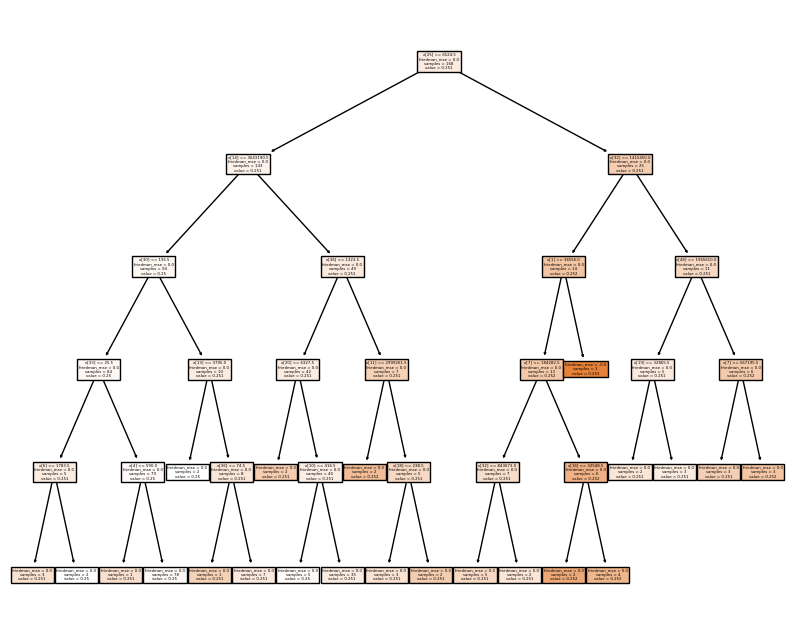

In [124]:
# visualize the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(dt_b,filled=True)
plt.show()

In [125]:
# evaluation
# R-squared
R2 = r2_score(y_test,b_pred)

print(R2)


0.8022967146243871


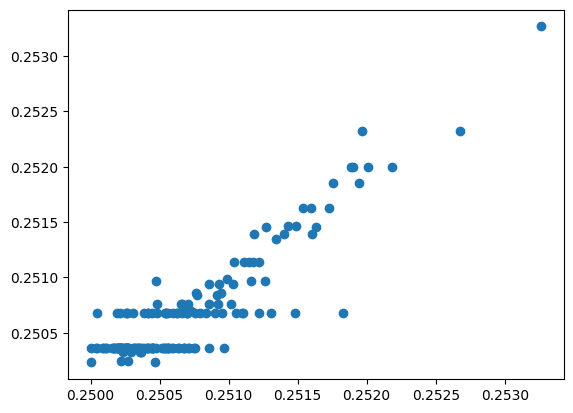

In [126]:
plt.scatter(y_test,b_pred)

**Random Forest**

In [127]:
# no scaling because the ensemble method is not sensitive to feature scale
# split train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [128]:
# Initialize model
rf = RandomForestRegressor()

In [129]:
param_ = {
    'n_estimators': [70, 100],
    'criterion':['squared_error'],
    'max_depth':[4, 6, 8],
    'min_samples_split':[4, 5, 6],
}

In [130]:
grid = GridSearchCV(rf, param_grid = param_, cv = 3)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_split': 4,
 'n_estimators': 100}

In [131]:
# use the best parameter combo to build the model
rf_b = RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=70).fit(X_train, y_train)

In [132]:
# predict the result
b_pred = rf_b.predict(X_test)

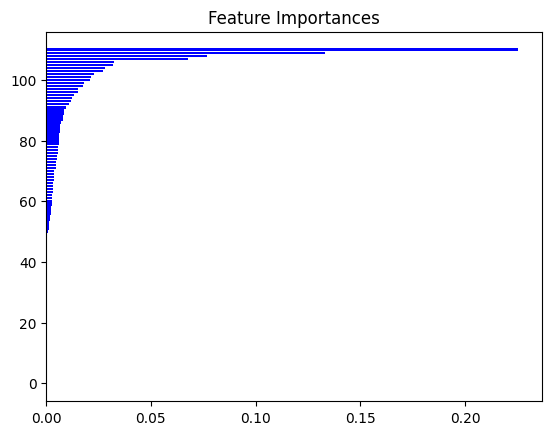

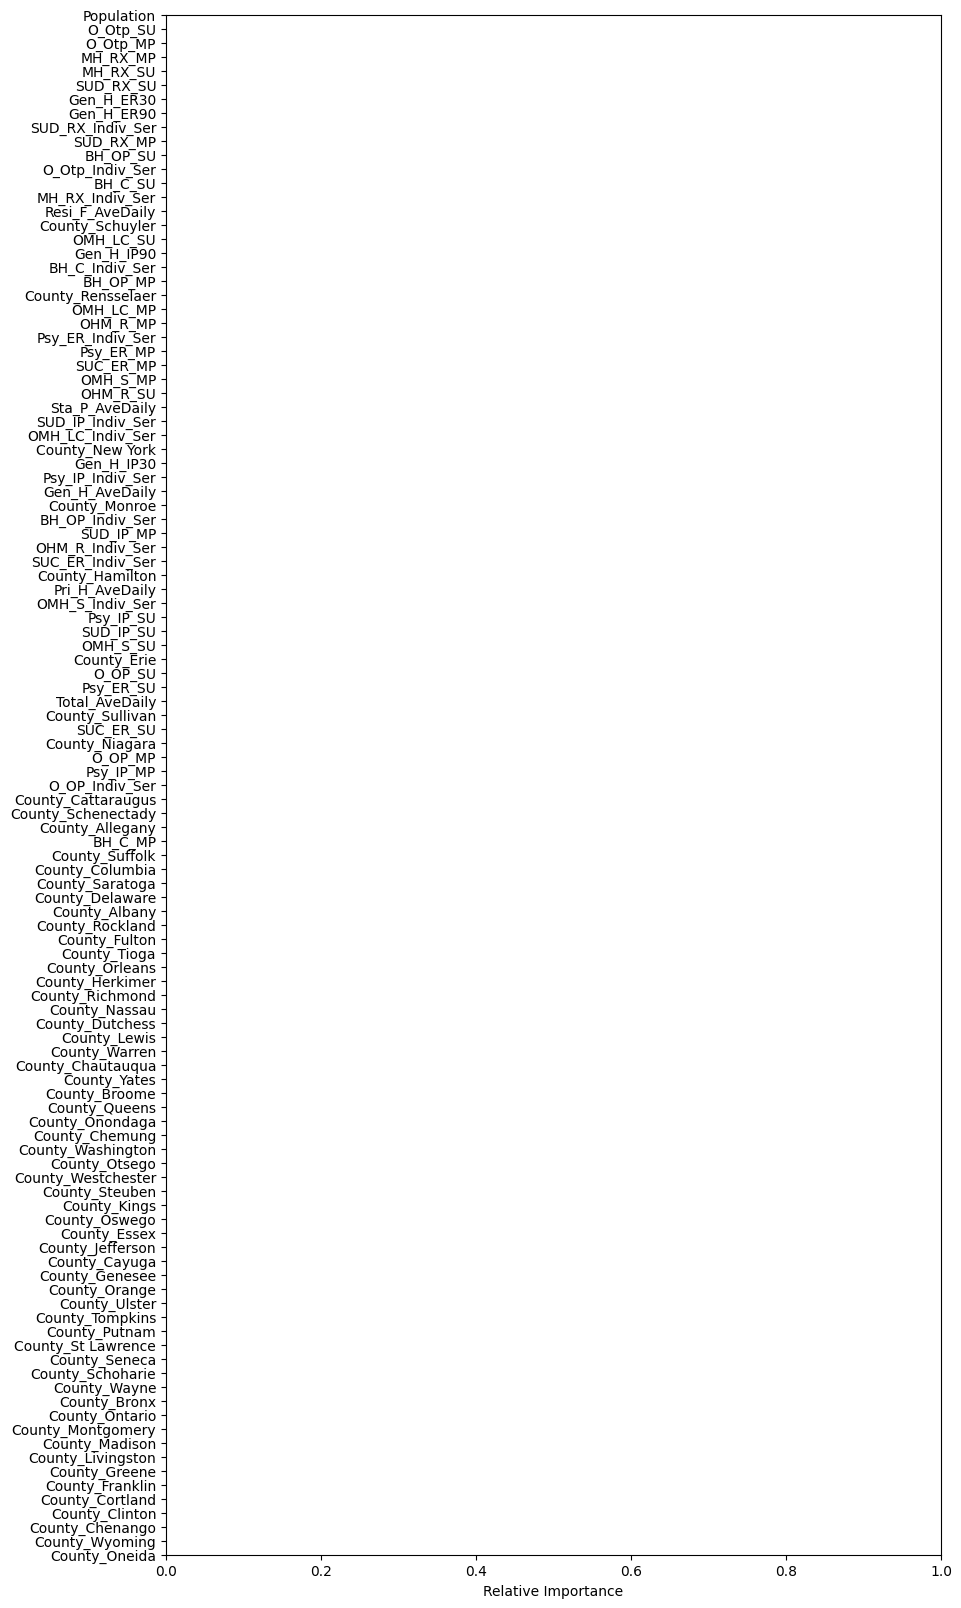

In [133]:
# feature importance

features = X_test.columns
importances = rf_b.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.figure(figsize=(10,20))
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()
# oh no

In [134]:
# evaluation
# R-squared
R2 = r2_score(y_test,b_pred)

print(R2)

0.6748578892195163


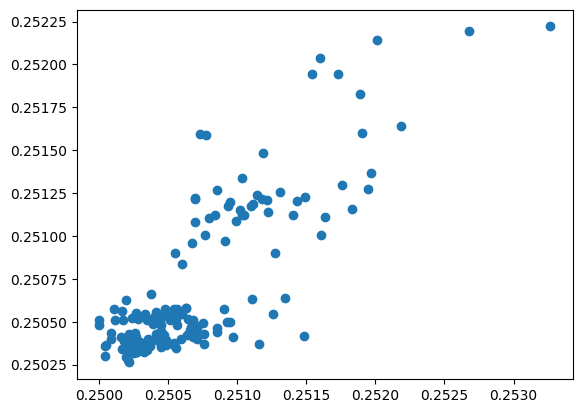

In [135]:
plt.scatter(y_test,b_pred)

**Gradient Boosting regression**

In [136]:
# no scaling because the ensemble method is not sensitive to feature scale

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [138]:
gbreg = GradientBoostingRegressor()

In [139]:
param_ = {
    'n_estimators': [70, 90],
    'max_depth': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'learning_rate': [0.01,0.02],
    'loss': ['squared_error']
}

In [140]:
grid = GridSearchCV(gbreg, param_grid = param_, cv = 3)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.02,
 'loss': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 90}

In [141]:
gbregb = GradientBoostingRegressor(learning_rate=0.02, loss = 'squared_error', max_depth=4, min_samples_split=4, n_estimators= 90).fit(X_train, y_train)

In [142]:
y_pred = gbregb.predict(X_test)

In [143]:
#evaluation
mse = mean_squared_error(y_test, gbregb.predict(X_test))
print("The mean squared error (MSE) on test set: {:.8f}".format(mse))

The mean squared error (MSE) on test set: 0.00000010


In [144]:
# evaluation more
# R-squared
R2 = r2_score(y_test,y_pred)

print(R2)

0.651474241774961


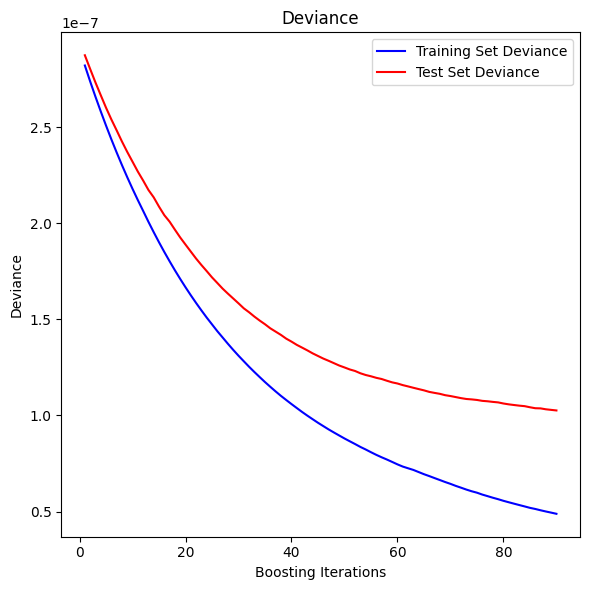

In [145]:
# training deviance and testing deviance

test_score = np.zeros((grid.best_params_["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbregb.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(grid.best_params_["n_estimators"]) + 1,
    gbregb.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(grid.best_params_["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

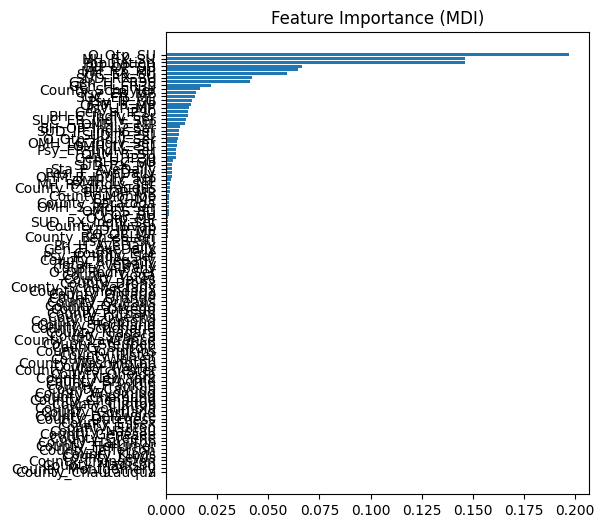

In [146]:
# feature importance

feature_importance = gbregb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

plt.show()

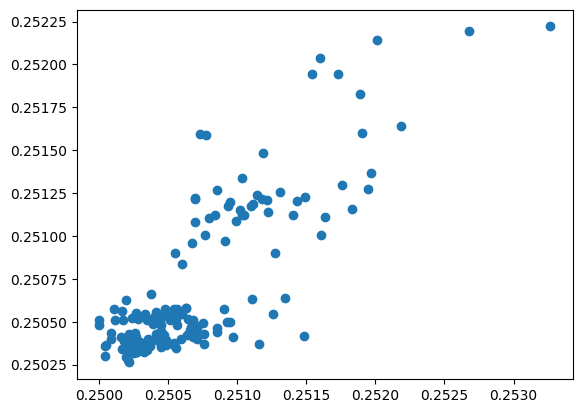

In [147]:
plt.scatter(y_test,b_pred)

**multivariable regression**

In [183]:
X = DAL.drop(columns = ['County', 'Year','Index Count', 'Violent Count','Property Count', 'Firearm Count', 'Crime_Index', 'Crime_Total'])
y = DAL['Crime_Index']

In [184]:
# rescale the data
X_tran = MinMaxScaler().fit_transform(X)

In [185]:
X_t = pd.DataFrame(X_tran, columns = X.columns.tolist())

In [187]:
X_t

,BH_C_Indiv_Ser,BH_OP_Indiv_Ser,MH_RX_Indiv_Ser,OHM_R_Indiv_Ser,OMH_LC_Indiv_Ser,OMH_S_Indiv_Ser,O_OP_Indiv_Ser,O_Otp_Indiv_Ser,Psy_ER_Indiv_Ser,Psy_IP_Indiv_Ser,...,Gen_H_AveDaily,Sta_P_AveDaily,Pri_H_AveDaily,Resi_F_AveDaily,Total_AveDaily,Gen_H_IP30,Gen_H_IP90,Gen_H_ER30,Gen_H_ER90,Population
0,0.026794,0.070306,0.059215,0.312371,0.040488,0.145374,0.002165,0.077278,0.060397,0.070368,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.029586,0.027261,0.013026,0.013672,0.114977
1,0.006128,0.019329,0.013336,0.014433,0.011316,0.030250,0.072393,0.008557,0.008570,0.011639,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.095155,0.100646,0.118052,0.122106,0.016511
2,0.594125,0.848761,0.799443,0.861856,0.786097,0.765198,0.512987,0.681938,0.775689,0.979498,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.556213,0.585502,0.615230,0.628906,0.543516
3,0.045598,0.070627,0.064518,0.097938,0.043551,0.113510,0.003183,0.098473,0.076505,0.054778,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.011834,0.012392,0.017034,0.018880,0.072956
4,0.008981,0.035726,0.031917,0.046392,0.028062,0.056681,0.072393,0.036862,0.020775,0.029258,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.009862,0.013011,0.015030,0.016276,0.027431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.073330,0.109889,0.099580,0.162195,0.092208,0.100294,0.072393,0.142128,0.101767,0.101274,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.095155,0.100646,0.118052,0.122106,0.010446
554,0.073330,0.109889,0.099580,0.162195,0.092208,0.100294,0.072393,0.142128,0.101767,0.101274,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.095155,0.100646,0.118052,0.122106,0.005397
555,0.073330,0.109889,0.099580,0.162195,0.092208,0.100294,0.072393,0.142128,0.101767,0.101274,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.095155,0.100646,0.118052,0.122106,0.011744
556,0.073330,0.109889,0.099580,0.162195,0.092208,0.100294,0.072393,0.142128,0.101767,0.101274,...,0.088983,0.101178,0.057352,0.104636,0.11773,0.095155,0.100646,0.118052,0.122106,0.017408


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 7)

In [189]:
# linear

lr = LinearRegression().fit(X_train,y_train)
y_pred_ = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.5058146393000615


RMSE: 0.0004
r2 score: 0.5058


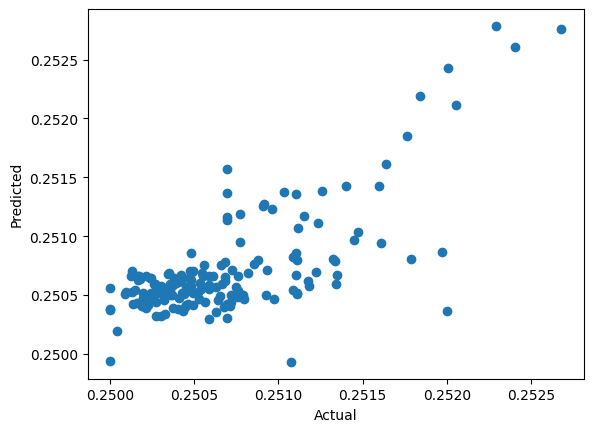

In [190]:
plt.scatter(y_test, y_pred_)
plt.ylabel('Predicted')
plt.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, y_pred_)))
print('r2 score: %.4f' % r2_score(y_test, y_pred_))

In [191]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

In [197]:
coefficients

,0,0
0,BH_C_Indiv_Ser,-0.000087
1,BH_OP_Indiv_Ser,0.004028
2,MH_RX_Indiv_Ser,0.000334
3,OHM_R_Indiv_Ser,-0.000180
4,OMH_LC_Indiv_Ser,0.002583
5,OMH_S_Indiv_Ser,0.000598
6,O_OP_Indiv_Ser,-0.000812
7,O_Otp_Indiv_Ser,0.000556
8,Psy_ER_Indiv_Ser,-0.008508
9,Psy_IP_Indiv_Ser,0.000761


In [192]:
# quadratic

pf = PolynomialFeatures (degree = 3)
x_quad = pf.fit_transform(X_train)
x_quad_ = pf.fit_transform(X_test)

plr = LinearRegression().fit(x_quad,y_train)

y_pred = plr.predict(x_quad_)


In [193]:
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# emm NO

RMSE: 930.5308
r2 score: -3282622539370.3540
